In [1]:
#-*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
# 심혈관 질환 데이터셋 불러오기
"""
    데이터셋 출처
    https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
"""
df = pd.read_csv('cardio_train2.csv')

df.head()

,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,29,175,59.0,120,80,1,1,0,0,1,0
1,1,29,159,59.0,120,80,1,1,0,0,1,0
2,2,29,175,92.0,100,60,1,1,0,0,1,0
3,1,30,160,59.0,110,70,1,1,0,0,1,0
4,1,39,173,73.0,160,100,1,1,0,0,0,1


In [2]:
# index를 제거하기 위한 작업
# 기존 DataFrame에는 인덱싱이 되어있기 때문에 그 부분을 제거하기 위한 작업
blankIndex=[''] * len(df)
# index값에 대입하여 인덱싱된 값을 제거
df.index=blankIndex
df.head()

,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,1,29,175,59.0,120,80,1,1,0,0,1,0
,1,29,159,59.0,120,80,1,1,0,0,1,0
,2,29,175,92.0,100,60,1,1,0,0,1,0
,1,30,160,59.0,110,70,1,1,0,0,1,0
,1,39,173,73.0,160,100,1,1,0,0,0,1


In [3]:
# 데이터 확인
print("\n* Data Shape : ", df.shape)
print("\n* Class : ", set(df['cardio'].values))
Y_NAME = "class"

#    target이 되는 클래스 : 0, 1
#    전처리 후 : normal, abnormal
# 각 컬럼별 NULL값 찾기
print("\n* NULL값 확인\n")
print(df[df.isnull().any(1)])


* Data Shape :  (65851, 12)

* Class :  {0, 1}

* NULL값 확인

Empty DataFrame
Columns: [gender, ages, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [4]:
df.rename(index=str, columns={"cardio": Y_NAME}, inplace=True)
df[Y_NAME].replace(0, "normal", inplace=True)
df[Y_NAME].replace(1, "abnormal", inplace=True)

labels = set(df[Y_NAME].values)
print("\n* Class : ",labels)
df.head()


* Class :  {'normal', 'abnormal'}


,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,class
,1,29,175,59.0,120,80,1,1,0,0,1,normal
,1,29,159,59.0,120,80,1,1,0,0,1,normal
,2,29,175,92.0,100,60,1,1,0,0,1,normal
,1,30,160,59.0,110,70,1,1,0,0,1,normal
,1,39,173,73.0,160,100,1,1,0,0,0,abnormal


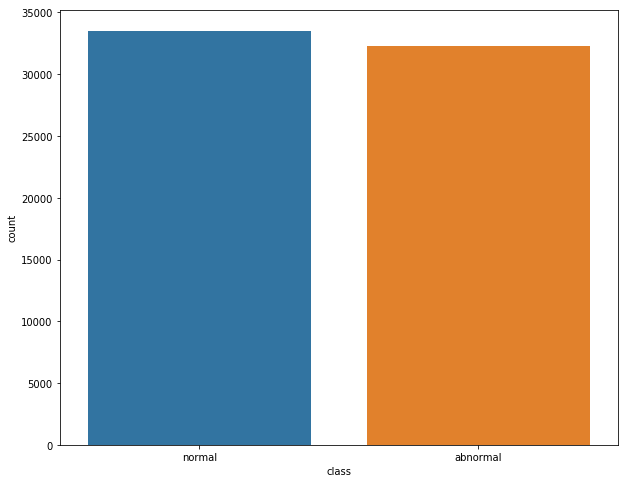

In [5]:
a4_dims = (10, 8)
plt.subplots(figsize=a4_dims)
sns.set_context("paper", font_scale=2)
# Data balance확인
sns.countplot(x=df[Y_NAME], data=df)

# 벨런스 편---안

In [6]:
# 데이터 전처리 및 비율 확인
labels_count = dict(normal=0, abnormal=0)
total = 0

print(*np.unique(df[Y_NAME],return_counts=True))
for label in df[Y_NAME].values:
    labels_count[label] += 1
for count in labels_count.values():
    total += count
for label in labels_count.items():
    print("{0: <15} 개수:{1}개\t데이터비중:{2:.3f}".format(*label, label[1]/total))
del labels_count

['abnormal' 'normal'] [32320 33531]
normal          개수:33531개	데이터비중:0.509
abnormal        개수:32320개	데이터비중:0.491


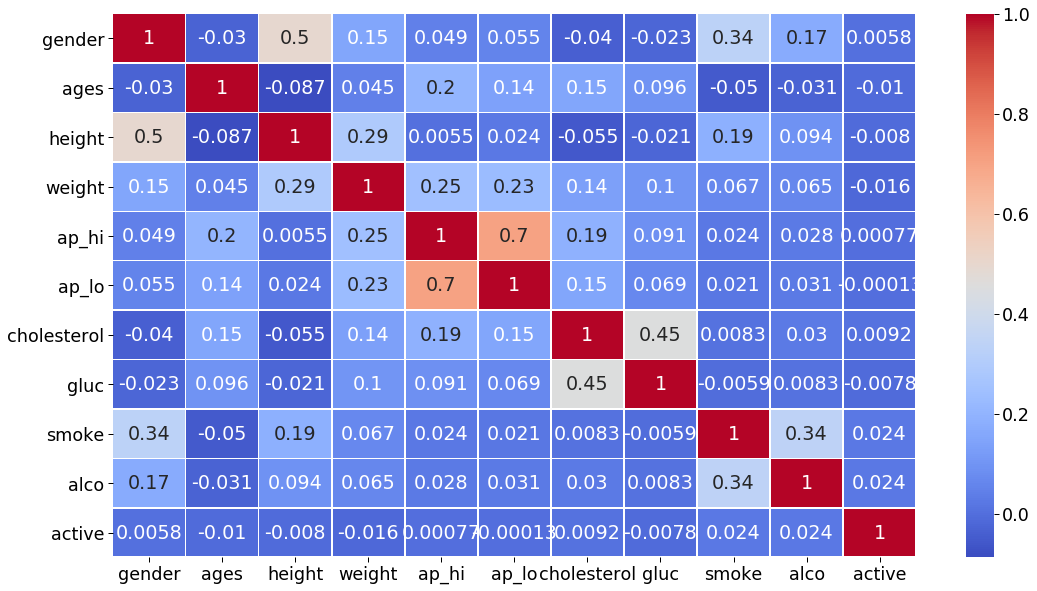

In [7]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

Feature Selection
-------------

1. Univariate Selection
2. Recursive Feature Elimination

In [8]:
# 객관적인 수치가 아닌 항목은 제외
x = df[['ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)
print("{}".format(fit.scores_))
features = fit.transform(x)

[3.123e+03 1.591e-03 8.319e+00 4.984e+03 1.912e+04 6.351e+03 1.066e+03
 1.335e+02]


In [10]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 'ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc'

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

# 최종 사용할 Features : ages, gender, ap_hi, cholesterol, glus

Num Features: 5
Selected Features: [ True  True False False  True False  True  True]
Feature Ranking: [1 1 4 3 1 2 1 1]


***
### ● Target Features : normal, abnormal
### ● Feature : 11 -> 8 -> 5
> 본인의 주관적인 특성 제거 : smkoe, alco, active

### ● training : test = 75% : 25%
### ● 아래의 과정으로 최적화 알고리즘 찾기


In [11]:
x = df[['ages', 'gender', 'ap_hi', 'cholesterol', 'gluc']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

# 각 알고리즘별 정확도를 담을 리스트
Classifiers = list()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

y_pred = 0
KN = 0
n = [100,200,300,400]

for i in range(len(n)):

    # KNN분류를 위한 분류모델 생성
    clf = KNeighborsClassifier(n_neighbors = n[i])

    # KNN 분류 모델에 train데이터를 피팅
    clf.fit(x_train, y_train)

    # 결과 출력
    print("N 값 : ",n[i])
    print("테스트 세트 예측 : {}".format(clf.predict(x_test)))
    print("테스트 세트 정확도 : {}\n".format(clf.score(x_test, y_test)))
    if(clf.score(x_test, y_test) > y_pred):
        y_pred = clf.score(x_test, y_test)
        KN = n[i]

print("최종 : {}".format(KN))
clf = KNeighborsClassifier(n_neighbors = KN)
clf.fit(x_train, y_train)
# 테스트 세트 예측 결과물
y_pred_KN = clf.predict(x_test)
Classifiers.append(y_pred_KN)

N 값 :  100
테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7178521533134908

N 값 :  200
테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7219218854400777

N 값 :  300
테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7220433699811699

N 값 :  400
테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7222863390633542

최종 : 400


In [13]:
# 가우시안 나이브 베이즈 알고리즘
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(GNB.predict(x_test)))
print("테스트 세트 정확도 : {}".format(GNB.score(x_test, y_test)))

y_pred_NB = GNB.predict(x_test)
Classifiers.append(y_pred_NB)

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7063718641802831


In [14]:
from sklearn.tree import DecisionTreeClassifier

y_pred = 0
tree = 0
for i in range(5, 15):
    DTR = DecisionTreeClassifier(max_depth = i)
    DTR.fit(x_train,y_train)

    # 결과 출력
    print("테스트 세트 예측 : {}".format(DTR.predict(x_test)))
    print("테스트 세트 정확도 : {}\n".format(DTR.score(x_test, y_test)))
    if(DTR.score(x_test, y_test) > y_pred):
        y_pred = DTR.score(x_test, y_test)
        tree = i

print("가장 적합한 깊이 : ",tree)
DTR = DecisionTreeClassifier(max_depth = tree)
DTR.fit(x_train,y_train)
y_pred_Deci = DTR.predict(x_test)
Classifiers.append(y_pred_Deci)

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7259916175666646

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7262345866488489

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7265382980015793

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7259916175666646

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7252019680495657

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7232582153920913

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7225900504160846

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7214359472757091

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.720524813217518

테스

In [15]:
# 랜덤 포레스트 분류 알고리즘
from sklearn.ensemble import RandomForestClassifier

pred_RF = 0
tree = 0

# 적합한 깊이 찾기
for i in range(5,15):
    RFC = RandomForestClassifier(max_depth = i)
    RFC.fit(x_train, y_train)
    # 결과 출력
    print("테스트 세트 예측 : {}".format(RFC.predict(x_test)))
    print("테스트 세트 정확도 : {}\n".format(RFC.score(x_test, y_test)))
    if(RFC.score(x_test, y_test) > pred_RF):
        tree = i
        pred_RF = RFC.score(x_test, y_test)
    
print("가장 적합한 깊이 : {}\n".format(tree))

# 적합한 n_estimators 찾기
pred_RF = 0
n_es = 0
n = [400,500,600,700]
for i in range(len(n)):
    RFC = RandomForestClassifier(n_estimators = n[i], max_depth = tree)
    RFC.fit(x_train, y_train)
    # 결과 출력
    print("테스트 세트 예측 : {}".format(RFC.predict(x_test)))
    print("테스트 세트 정확도 : {}\n".format(RFC.score(x_test, y_test)))
    if(RFC.score(x_test, y_test) > pred_RF):
        n_es = n[i]
        pred_RF = RFC.score(x_test, y_test)    

print("가장 적합한 n_estimators : {}\n".format(n_es))

RFC = RandomForestClassifier(n_estimators = n_es, max_depth = tree)
RFC.fit(x_train, y_train)
y_pred_RF = RFC.predict(x_test)
Classifiers.append(y_pred_RF)

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7243515762619207

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7230759885804532

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7290894733645144

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7278746279535929

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7282390815768693

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.726295328919395

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.72544493713175

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7222255967928081

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.719674421429873

테스트 세

In [16]:
# GradientBoostingClassifier 사용
from sklearn.ensemble import GradientBoostingClassifier

pred_RF = 0
n_es = 0
n = [100,200,300,400,500]
for i in range(len(n)):
    GBC = GradientBoostingClassifier(n_estimators = n[i])
    GBC.fit(x_train, y_train)

    # 결과 출력
    print("테스트 세트 예측 : {}".format(GBC.predict(x_test)))
    print("테스트 세트 정확도 : {}\n".format(GBC.score(x_test, y_test)))
    if(GBC.score(x_test, y_test) > pred_RF):
        n_es = n[i]
        pred_RF = GBC.score(x_test, y_test) 
        
print("\n최종 n_estimators : {}".format(n_es))
GBC = GradientBoostingClassifier(n_estimators = n_es)
GBC.fit(x_train, y_train)
y_pred_GBC = GBC.predict(x_test)
Classifiers.append(y_pred_GBC)

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7292109579056065

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7289072465528762

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.728785762011784

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7283605661179615

테스트 세트 예측 : ['normal' 'normal' 'abnormal' ... 'abnormal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.7284820506590536


최종 n_estimators : 100


정확도 값
-------------

1. Accuracy_Score
2. F1_Score

In [17]:
Class = ['KNeighbors', 'Naive Bayes' ,'DecisionTree', 'RandomForest' , 'GradientBoosting']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(y_test,Classifiers[pred]):
        a = accuracy_score(y_test,Classifiers[pred])
        index=pred
        
    print("{} 분류기 정확도 : {}%".format(Class[pred],accuracy_score(y_test,Classifiers[pred])*100))
    
print("\n{} 분류기가 가장정확함\n정확도 : {}%".format(Class[index],a*100))

KNeighbors 분류기 정확도 : 72.22863390633542%
Naive Bayes 분류기 정확도 : 70.6371864180283%
DecisionTree 분류기 정확도 : 72.65382980015794%
RandomForest 분류기 정확도 : 72.93931847172446%
GradientBoosting 분류기 정확도 : 72.92109579056066%

RandomForest 분류기가 가장정확함
정확도 : 72.93931847172446%


In [18]:
from sklearn.metrics import f1_score

for i in range(len(Classifiers)):
    print(Class[i])
    print("macro : {}".format(f1_score(y_test, Classifiers[i], average='macro')))
    print("micro : {}".format(f1_score(y_test, Classifiers[i], average='micro')))
    print("weighted : {}".format(f1_score(y_test, Classifiers[i], average='weighted')))
    print("None : {}\n".format(f1_score(y_test, Classifiers[i], average=None)))

KNeighbors
macro : 0.7205302852576306
micro : 0.7222863390633542
weighted : 0.721059119851998
None : [0.698 0.743]

Naive Bayes
macro : 0.7004903651420212
micro : 0.7063718641802831
weighted : 0.7014922850041959
None : [0.659 0.742]

DecisionTree
macro : 0.7248985921077098
micro : 0.7265382980015793
weighted : 0.7254055979427144
None : [0.704 0.746]

RandomForest
macro : 0.7283545087077754
micro : 0.7293931847172446
weighted : 0.7287554907035725
None : [0.712 0.745]

GradientBoosting
macro : 0.7282499719852409
micro : 0.7292109579056066
weighted : 0.7286357405927012
None : [0.712 0.744]

